# Mini Project 2

##  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

_In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed._

_Investigate if the log returns of stocks or indexes of your choosing are normally distributed._

-------------------------

We will use the D'Agostino and Pearson test to test for normality of log returns of stock price data. We will sometimes use the Shapiro-Wilk and Anderson-Darling tests to confirm the results.  

In [1]:
# Package imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')

# Import packages for yfinance

import yfinance as yf
import datetime as dt

I first give some general code that can be used for any stock and any number of trading days (_n_). 

## Compute rolling D'Agostino Pearson p-values for normality of log returns over _n_ trading days

I compute the p-value of the D'Agostino and Pearson test for normality of log returns of a given stock code over rolling windows of the previous _n_ trading days. 

**Example 1: VOO with n=252** (yearly rolling window)

[*********************100%***********************]  1 of 1 completed


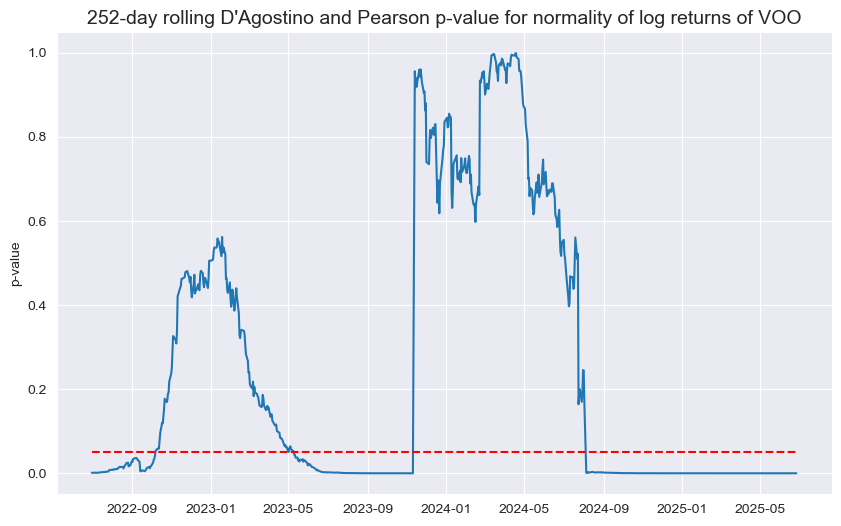

In [2]:
# Load any stock (only one though!)

stock_code='VOO' 

# number of years of data to look at

y=4

start_date = dt.datetime.today() - dt.timedelta(days = y*365)
end_date = dt.datetime.today()

data = yf.download(stock_code, start = start_date, end = end_date, auto_adjust=True)
returns = data['Close']/data['Close'].shift(1)
logreturns = np.log(returns.dropna())

# Number of trading days we want to look at. (n=21 for one month, n=63 for one quarter, n=252 for 1 year)
n = 252

logreturns_rolling_data = [np.array(logreturns[stock_code][i:n+i]) for i in range(len(logreturns)-n+1)]

p_vals = [stats.normaltest(logreturns_rolling_data[i])[1] for i in range(len(logreturns_rolling_data))]

indexes = logreturns.index[n-1:]

p_vals_dated = pd.DataFrame(p_vals,index = indexes)

plt.figure(figsize = (10,6))
plt.plot(p_vals_dated)
plt.title(f"{n}-day rolling D'Agostino and Pearson p-value for normality of log returns of {stock_code}", size = 14)
plt.hlines(0.05,indexes[0], indexes[-1],colors=['r'], linestyle=['--'])
plt.ylabel('p-value')
plt.show()

Strong evidence to suggest log returns are normally distributed in certain time periods (all time periods of length one year with end date corresponding to points when blue curve lies above dashed red line).  Cool! Future task: pin down these exact dates.

**Example 2: GLD with n=63** (quarterly rolling window)

[*********************100%***********************]  1 of 1 completed


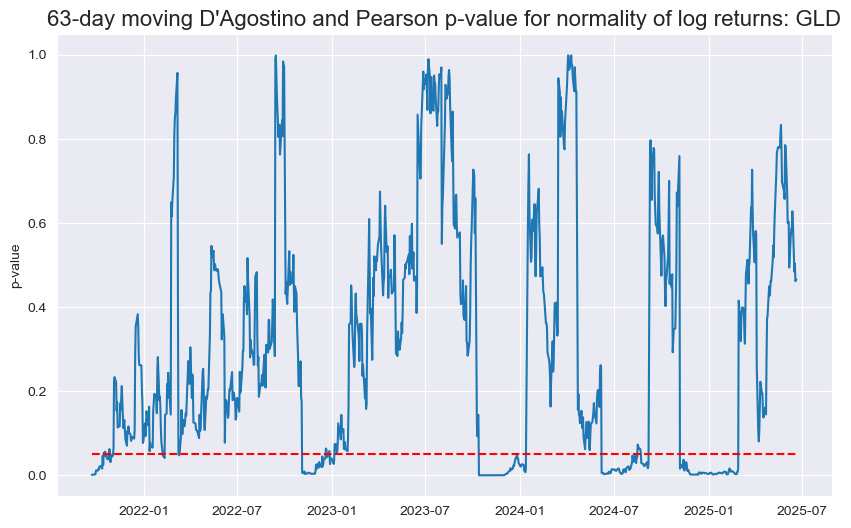

In [3]:
stock_code='GLD' 

t=4 # number of years of data we want to look at
start_date = dt.today() - dt.timedelta(days = 4*365)
end_date = dt.today()

data = yf.download(stock_code, start = start_date, end = end_date, auto_adjust=True)
returns = data['Close']/data['Close'].shift(1)
logreturns = np.log(returns.dropna())

# Number of trading days we want to look at. (n=21 for one month, n=63 for one quarter, n=252 for 1 year)
n = 63

logreturns_rolling_data = [np.array(logreturns[stock_code][i:n+i]) for i in range(len(logreturns)-n+1)]

p_vals = [stats.normaltest(logreturns_rolling_data[i])[1] for i in range(len(logreturns_rolling_data))]

indexes = logreturns.index[n-1:]

p_vals_dated = pd.DataFrame(p_vals,index = indexes)

plt.figure(figsize = (10,6))
plt.plot(p_vals_dated)
plt.title(f"{n}-day moving D'Agostino and Pearson p-value for normality of log returns: {stock_code}", size = 16)
plt.hlines(0.05,indexes[0], indexes[-1],colors=['r'], linestyle=['--'])
plt.ylabel('p-value')
plt.show()

## Analysis of normality for specific stock data

For no particular reason, I will analyse four years of stock data for:

GLD - SPDR Gold Shares \
VOO -  Vanguard S&P 500 ETF \
BLK - BlackRock Inc \
NVDA - Nvidia Corporation.

To fix the data, I will consider the four years up until June 22 2025.

### Individual stocks

In [5]:
# Four years of data

start_date = dt.datetime(2025, 6, 22, 0, 0, 0, 0) - dt.timedelta(days = 4*365)
end_date = dt.datetime(2025, 6, 22, 0, 0, 0, 0)

# GLD stock data, isolate the logreturn data as a numpy array.

GLD_stock = yf.download('GLD', start = start_date, end = end_date, auto_adjust=True)
GLD_returns = GLD_stock['Close']/GLD_stock['Close'].shift(1)
GLD_logreturns = np.log(GLD_returns.dropna())['GLD'].values

# VOO

VOO_index = yf.download('VOO', start = start_date, end = end_date, auto_adjust=True)
VOO_returns = VOO_index['Close']/VOO_index['Close'].shift(1)
VOO_logreturns = np.log(VOO_returns.dropna())['VOO'].values

# BLK

BLK_stock = yf.download('BLK', start = start_date, end = end_date, auto_adjust=True)
BLK_returns = BLK_stock['Close']/BLK_stock['Close'].shift(1)
BLK_logreturns = np.log(BLK_returns.dropna())['BLK'].values

# NVDA

NVDA_stock = yf.download('NVDA', start = start_date, end = end_date, auto_adjust=True)
NVDA_returns = NVDA_stock['Close']/NVDA_stock['Close'].shift(1)
NVDA_logreturns = np.log(NVDA_returns.dropna())['NVDA'].values

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  4 of 4 completed


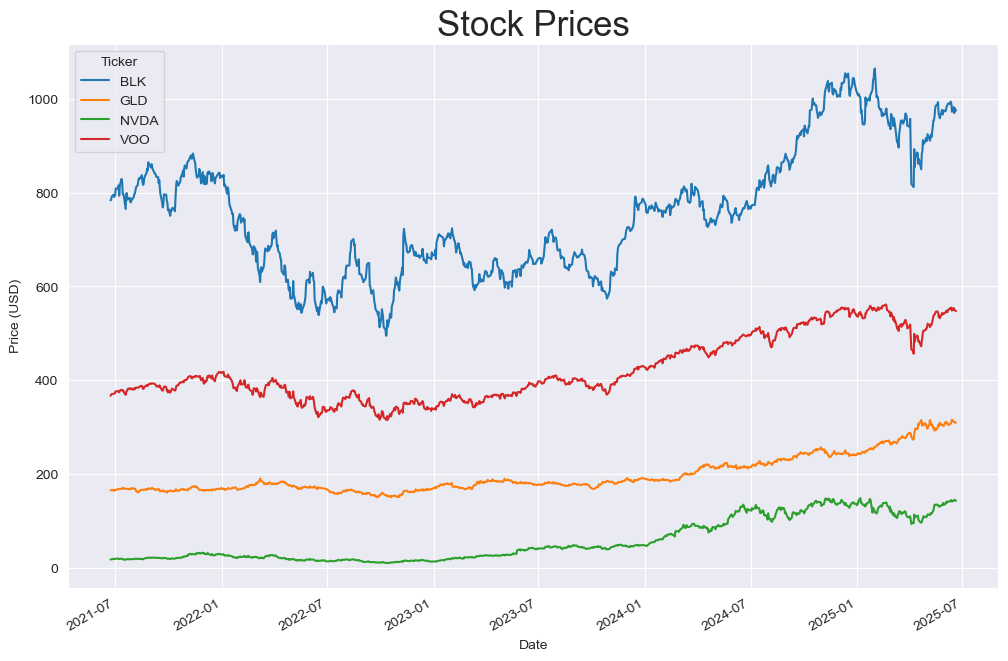

In [6]:
# Now plot the daily closing stock prices

stocks = yf.download(['GLD', 'VOO', 'BLK','NVDA'], start = start_date, end = end_date, auto_adjust=True)

stocks['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 25)
plt.ylabel('Price (USD)')
plt.show()

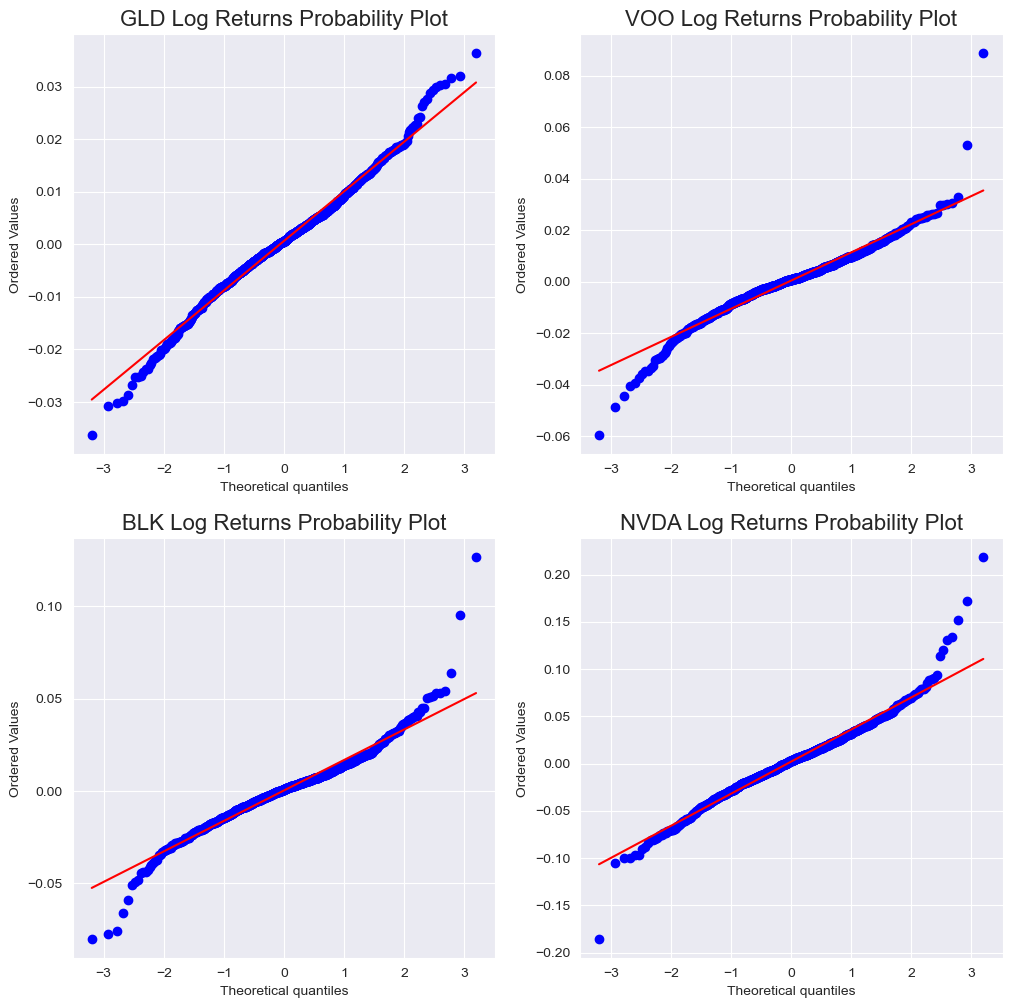

In [7]:
# Next, we plot the probability plots examining normality of the log returns.

# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot GLD log returns
stats.probplot(GLD_logreturns,dist="norm",plot=axes[0,0])
axes[0,0].set_title("GLD Log Returns Probability Plot", fontsize=16)
axes[0,0].grid(True)

# Plot VOO log returns
stats.probplot(VOO_logreturns, dist="norm",plot=axes[0,1])
axes[0,1].set_title("VOO Log Returns Probability Plot", fontsize=16)
axes[0,1].grid(True)

# Plot BLK log returns
stats.probplot(BLK_logreturns, dist="norm",plot=axes[1,0])
axes[1,0].set_title("BLK Log Returns Probability Plot", fontsize=16)
axes[1,0].grid(True)

# Plot NVDA log returns
stats.probplot(NVDA_logreturns, dist="norm", plot=axes[1,1])
axes[1,1].set_title("NVDA Log Returns Probability Plot", fontsize=16)
axes[1,1].grid(True)

plt.show()

**Observations:** We suspect that log returns might be normally distributed for GLD, but fails for all other stocks. Let's investigate using the D'Agostino and Pearson test.

In [8]:
# Collect p-values of normality tests

p_GLD = stats.normaltest(GLD_logreturns)[1]
p_VOO = stats.normaltest(VOO_logreturns)[1]
p_BLK = stats.normaltest(BLK_logreturns)[1]
p_NVDA = stats.normaltest(NVDA_logreturns)[1]

# Print evidence/non-evidence of normality

print(f"GLD log return distribution: p-value = {p_GLD:.4f}")
if p_GLD < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")


print('--'*40) 
print('--'*40) 


print(f"VOO log return distribution: p-value = {p_VOO:.4f}")
if p_VOO < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")


print('--'*40) 
print('--'*40) 


print(f"BLK log return distribution: p-value = {p_BLK:.4f}")
if p_BLK < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")


print('--'*40) 
print('--'*40) 


print(f"NVDA log return distribution: p-value = {p_NVDA:.4f}")
if p_NVDA < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

GLD log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
VOO log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
BLK log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


**Conclusion:** Strong evidence that log returns of all stocks are not normally distributed over the entire 4 years. 

Let's now investigate individual years for each stock.

In [9]:
# Relevant time frames: index the time periods of interest

yearly_index = int(np.floor(len(VOO_logreturns)/4))

# Confirm exact dates

print(f'Year 1 will be from {VOO_index.index[0]} to {VOO_index.index[yearly_index]}' )
print(f'Year 2 will be from {VOO_index.index[yearly_index+1]} to {VOO_index.index[2*yearly_index]}')
print(f'Year 3 will be from {VOO_index.index[2*yearly_index+1]} to {VOO_index.index[3*yearly_index]}')
print(f'Year 4 will be from {VOO_index.index[3*yearly_index+1]} to {VOO_index.index[-1]}')

Year 1 will be from 2021-06-23 00:00:00 to 2022-06-21 00:00:00
Year 2 will be from 2022-06-22 00:00:00 to 2023-06-20 00:00:00
Year 3 will be from 2023-06-21 00:00:00 to 2024-06-17 00:00:00
Year 4 will be from 2024-06-18 00:00:00 to 2025-06-20 00:00:00


#### VOO analysis

------------------------------------------------------------
------------------------------------------------------------
PLOTS OF CLOSING STOCK PRICES:
------------------------------------------------------------
------------------------------------------------------------


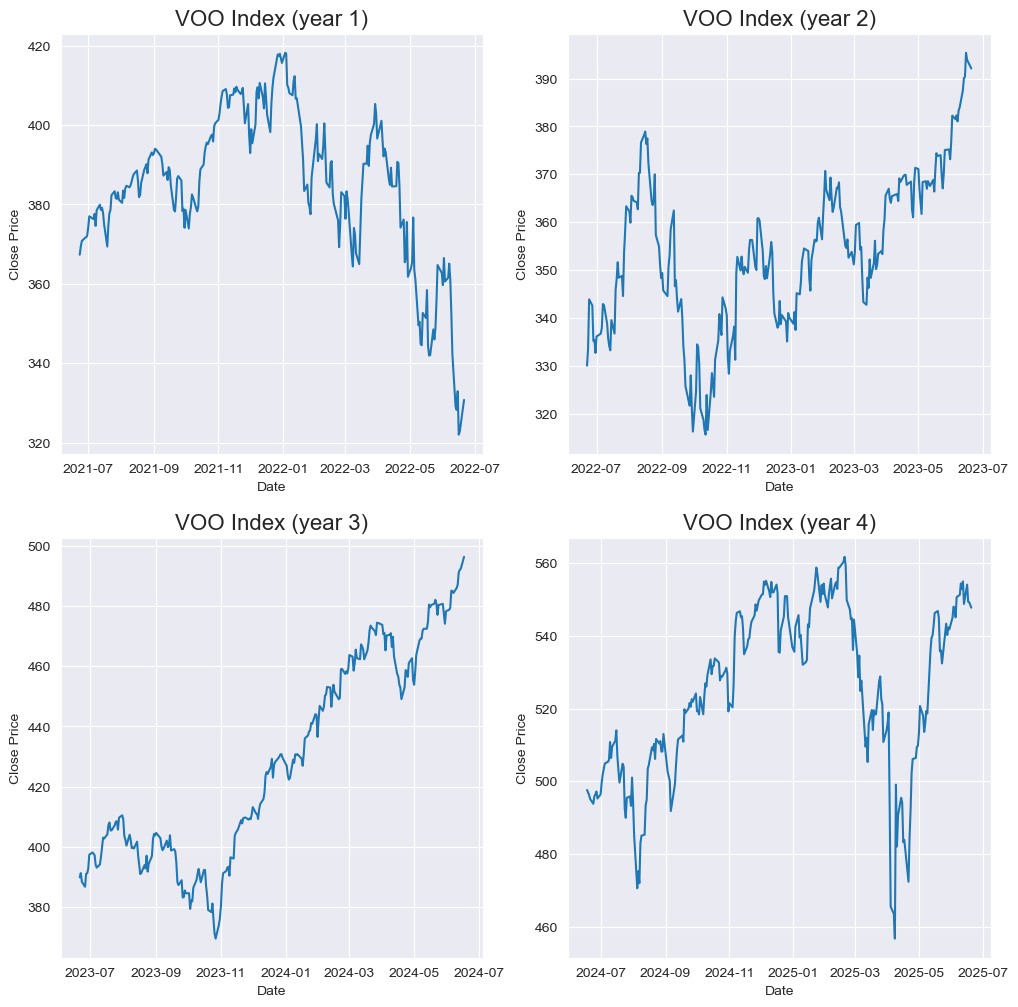

------------------------------------------------------------
------------------------------------------------------------
PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:
------------------------------------------------------------
------------------------------------------------------------


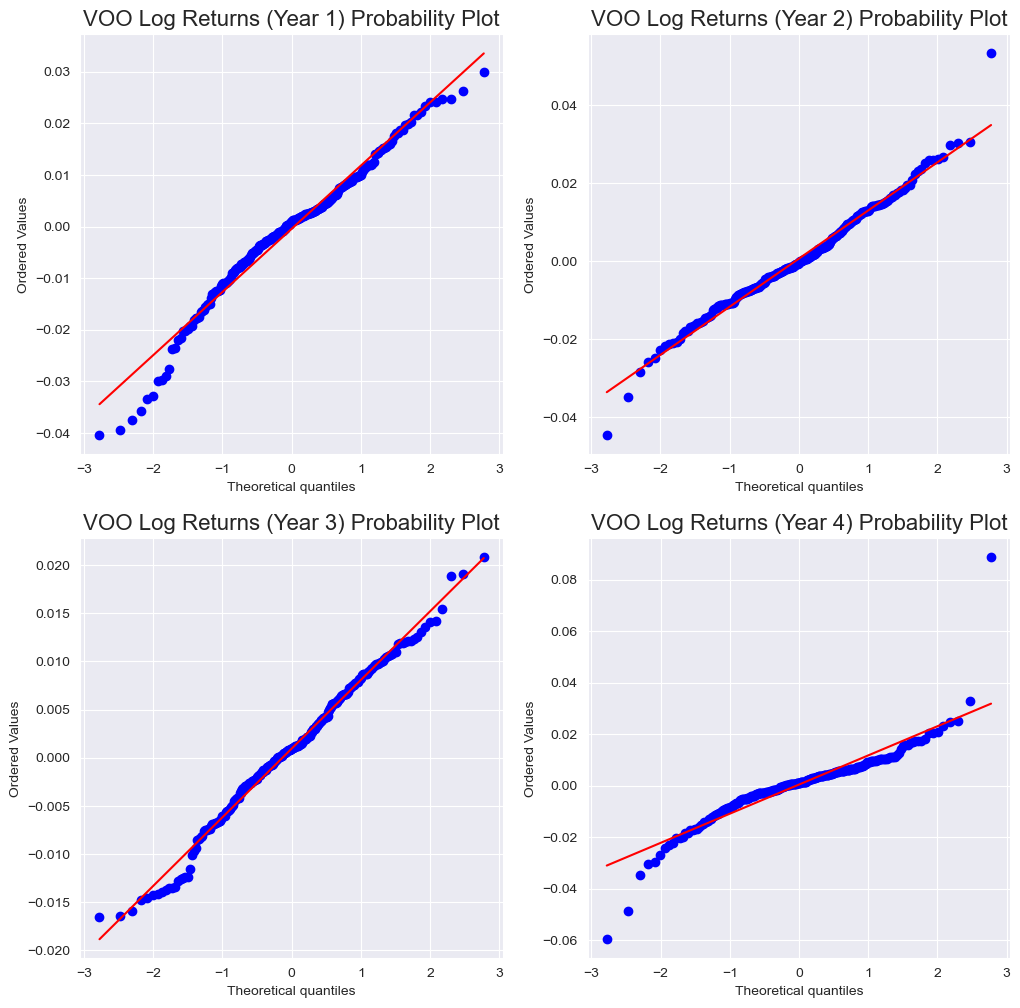

In [10]:
VOO_logreturns_year1 = VOO_logreturns[0:yearly_index]
VOO_logreturns_year2 = VOO_logreturns[yearly_index:2*yearly_index]
VOO_logreturns_year3 = VOO_logreturns[2*yearly_index:3*yearly_index]
VOO_logreturns_year4 = VOO_logreturns[3*yearly_index:]

VOO_year1 = VOO_index['Close'].iloc[0:yearly_index+1]  # adding 1 to account for the extra day at the start not included in the return data
VOO_year2 = VOO_index['Close'].iloc[yearly_index+1:2*yearly_index+1]
VOO_year3 = VOO_index['Close'].iloc[2*yearly_index+1:3*yearly_index+1]
VOO_year4 = VOO_index['Close'].iloc[3*yearly_index+1:]

print("---"*20)
print("---"*20)
print("PLOTS OF CLOSING STOCK PRICES:")
print("---"*20)
print("---"*20)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].plot(VOO_year1)
axes[0,0].set_title('VOO Index (year 1)', fontsize=16)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Close Price')
axes[0,0].grid(True)

axes[0,1].plot(VOO_year2)
axes[0,1].set_title('VOO Index (year 2)', fontsize=16)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Close Price')
axes[0,1].grid(True)

axes[1,0].plot(VOO_year3)
axes[1,0].set_title('VOO Index (year 3)', fontsize=16)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Close Price')
axes[1,0].grid(True)

axes[1,1].plot(VOO_year4)
axes[1,1].set_title('VOO Index (year 4)', fontsize=16)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Close Price')
axes[1,1].grid(True)

plt.show()

print("---"*20)
print("---"*20)

print("PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:")

print("---"*20)
print("---"*20)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stats.probplot(VOO_logreturns_year1, dist="norm", plot=axes[0,0])
axes[0,0].set_title('VOO Log Returns (Year 1) Probability Plot', fontsize = 16)
axes[0,0].grid(True)

stats.probplot(VOO_logreturns_year2, dist="norm", plot=axes[0,1])
axes[0,1].set_title('VOO Log Returns (Year 2) Probability Plot', fontsize = 16)
axes[0,1].grid(True)

stats.probplot(VOO_logreturns_year3, dist="norm", plot=axes[1,0])
axes[1,0].set_title('VOO Log Returns (Year 3) Probability Plot', fontsize = 16)
axes[1,0].grid(True)

stats.probplot(VOO_logreturns_year4, dist="norm", plot=axes[1,1])
axes[1,1].set_title('VOO Log Returns (Year 4) Probability Plot', fontsize = 16)
axes[1,1].grid(True)

plt.show()

In [11]:
# Now compute the p-values and test for normality

p_VOO_year1 = stats.normaltest(VOO_logreturns_year1)[1]
p_VOO_year2 = stats.normaltest(VOO_logreturns_year2)[1]
p_VOO_year3 = stats.normaltest(VOO_logreturns_year3)[1]
p_VOO_year4 = stats.normaltest(VOO_logreturns_year4)[1]

print(f"VOO log return (year 1) distribution: p-value = {p_VOO_year1:.4f}")
if p_VOO_year1 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"VOO log return (year 2) distribution: p-value = {p_VOO_year2:.4f}")
if p_VOO_year2 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"VOO log return (year 3) distribution: p-value = {p_VOO_year3:.4f}")
if p_VOO_year3 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"VOO log return (year 4) distribution: p-value = {p_VOO_year4:.4f}")
if p_VOO_year4 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

VOO log return (year 1) distribution: p-value = 0.0002
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
VOO log return (year 2) distribution: p-value = 0.0033
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
VOO log return (year 3) distribution: p-value = 0.6006
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
VOO log return (year 4) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distribu

**Summary**: Strong evidence that log returns of VOO are normally distributed in year 3! Strong evidence that log returns are _not_ normally distributed every other year. Let's cross reference the result for year 3 by performing the Anderson-Darling and Shapiro-Wilk tests for normality.

In [12]:
# Perform the Anderson-Darling test for normality

result = stats.anderson(VOO_logreturns_year3)

# Print the test statistic and critical values
print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}")
print("Critical Values:")
for i, crit_value in enumerate(result.critical_values):
    print(f"Level {result.significance_level[i]}%: {crit_value:.4f}")
       
print('---------')


# Check the p-value
if result.statistic < result.critical_values[2]:
    print("Anderson Darling result: No statistically significant evidence against the log returns following a normal distribution.")
else:
    print("Anderson Darling result: Reject the null hypothesis that the log returns follow a normal distribution.")

shap_p = stats.shapiro(VOO_logreturns_year3)[1]

print('---------')

print(f'Shapiro-Wilk p-value: {shap_p:.4f}')

print('---------')

# Check the p-value
if shap_p < 0.05:
    print("Shapiro-Wilk result: Reject the null hypothesis that the log returns follow a normal distribution.")
else:
    print("Shapiro-Wilk result: No statistically significant evidence against the log returns following a normal distribution.")

Anderson-Darling Test Statistic: 0.6178
Critical Values:
Level 15.0%: 0.5670
Level 10.0%: 0.6460
Level 5.0%: 0.7750
Level 2.5%: 0.9040
Level 1.0%: 1.0750
---------
Anderson Darling result: No statistically significant evidence against the log returns following a normal distribution.
---------
Shapiro-Wilk p-value: 0.1006
---------
Shapiro-Wilk result: No statistically significant evidence against the log returns following a normal distribution.


So there is indeed agreement across the other tests that the log returns of VOO in year 3 are normally distributed. Let's proceed with the other stocks.

#### GLD analysis

------------------------------------------------------------
------------------------------------------------------------
PLOTS OF CLOSING STOCK PRICES:
------------------------------------------------------------
------------------------------------------------------------


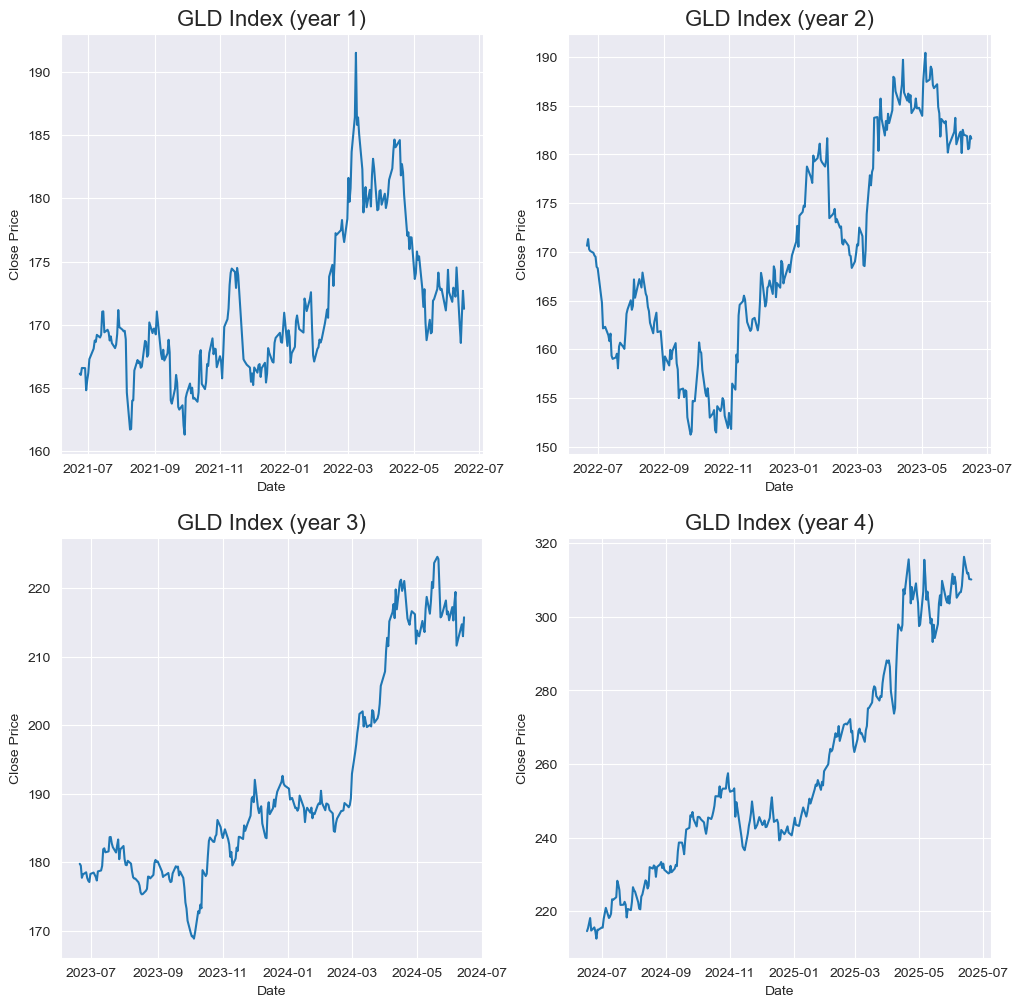

------------------------------------------------------------
------------------------------------------------------------
PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:
------------------------------------------------------------
------------------------------------------------------------


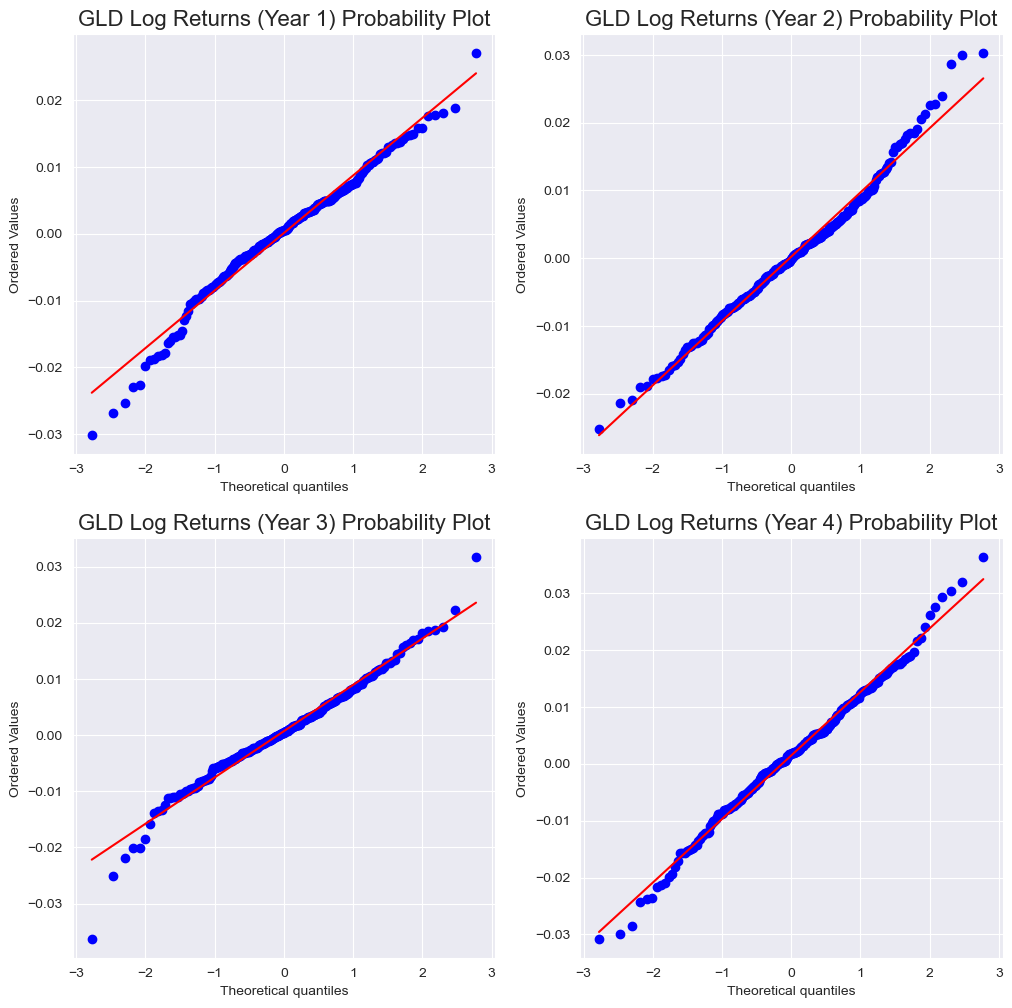

GLD log return (year 1) distribution: p-value = 0.0008
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
GLD log return (year 2) distribution: p-value = 0.0150
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
GLD log return (year 3) distribution: p-value = 0.0002
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
GLD log return (year 4) distribution: p-value = 0.2567
→ No statistically significant evidence against normal

In [13]:
GLD_logreturns_year1 = GLD_logreturns[0:yearly_index]
GLD_logreturns_year2 = GLD_logreturns[yearly_index:2*yearly_index]
GLD_logreturns_year3 = GLD_logreturns[2*yearly_index:3*yearly_index]
GLD_logreturns_year4 = GLD_logreturns[3*yearly_index:]

GLD_year1 = GLD_stock['Close'].iloc[0:yearly_index]
GLD_year2 = GLD_stock['Close'].iloc[yearly_index:2*yearly_index]
GLD_year3 = GLD_stock['Close'].iloc[2*yearly_index:3*yearly_index]
GLD_year4 = GLD_stock['Close'].iloc[3*yearly_index:]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

print("---"*20)
print("---"*20)
print("PLOTS OF CLOSING STOCK PRICES:")
print("---"*20)
print("---"*20)

axes[0,0].plot(GLD_year1)
axes[0,0].set_title('GLD Index (year 1)', fontsize=16)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Close Price')
axes[0,0].grid(True)

axes[0,1].plot(GLD_year2)
axes[0,1].set_title('GLD Index (year 2)', fontsize=16)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Close Price')
axes[0,1].grid(True)

axes[1,0].plot(GLD_year3)
axes[1,0].set_title('GLD Index (year 3)', fontsize=16)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Close Price')
axes[1,0].grid(True)

axes[1,1].plot(GLD_year4)
axes[1,1].set_title('GLD Index (year 4)', fontsize=16)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Close Price')
axes[1,1].grid(True)

plt.show()

print("---"*20)
print("---"*20)

print("PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:")

print("---"*20)
print("---"*20)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stats.probplot(GLD_logreturns_year1, dist="norm", plot=axes[0,0])
axes[0,0].set_title('GLD Log Returns (Year 1) Probability Plot', fontsize = 16)
axes[0,0].grid(True)

stats.probplot(GLD_logreturns_year2, dist="norm", plot=axes[0,1])
axes[0,1].set_title('GLD Log Returns (Year 2) Probability Plot', fontsize = 16)
axes[0,1].grid(True)

stats.probplot(GLD_logreturns_year3, dist="norm", plot=axes[1,0])
axes[1,0].set_title('GLD Log Returns (Year 3) Probability Plot', fontsize = 16)
axes[1,0].grid(True)

stats.probplot(GLD_logreturns_year4, dist="norm", plot=axes[1,1])
axes[1,1].set_title('GLD Log Returns (Year 4) Probability Plot', fontsize = 16)
axes[1,1].grid(True)

plt.show()



p_GLD_year1 = stats.normaltest(GLD_logreturns_year1)[1]
p_GLD_year2 = stats.normaltest(GLD_logreturns_year2)[1]
p_GLD_year3 = stats.normaltest(GLD_logreturns_year3)[1]
p_GLD_year4 = stats.normaltest(GLD_logreturns_year4)[1]

print(f"GLD log return (year 1) distribution: p-value = {p_GLD_year1:.4f}")
if p_GLD_year1 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"GLD log return (year 2) distribution: p-value = {p_GLD_year2:.4f}")
if p_GLD_year2 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"GLD log return (year 3) distribution: p-value = {p_GLD_year3:.4f}")
if p_GLD_year3 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"GLD log return (year 4) distribution: p-value = {p_GLD_year4:.4f}")
if p_GLD_year4 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

**Summary**: So we have evidence to suggest that the log returns of GLD are normally distributed in year 4! Every other year, we have strong evidence to suggest that the log returns are _not_ normally distributed.


#### BLK analysis 

------------------------------------------------------------
------------------------------------------------------------
PLOTS OF CLOSING STOCK PRICES:
------------------------------------------------------------
------------------------------------------------------------


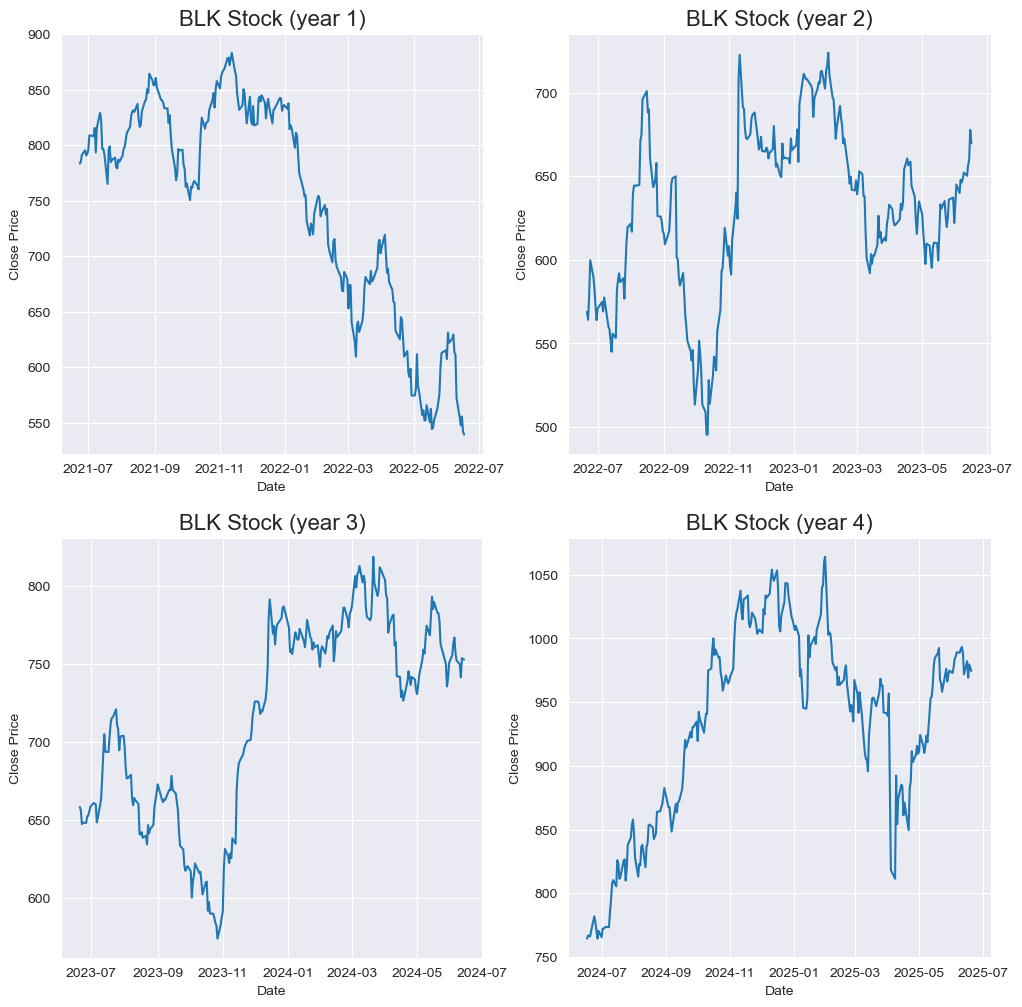

------------------------------------------------------------
------------------------------------------------------------
PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:
------------------------------------------------------------
------------------------------------------------------------


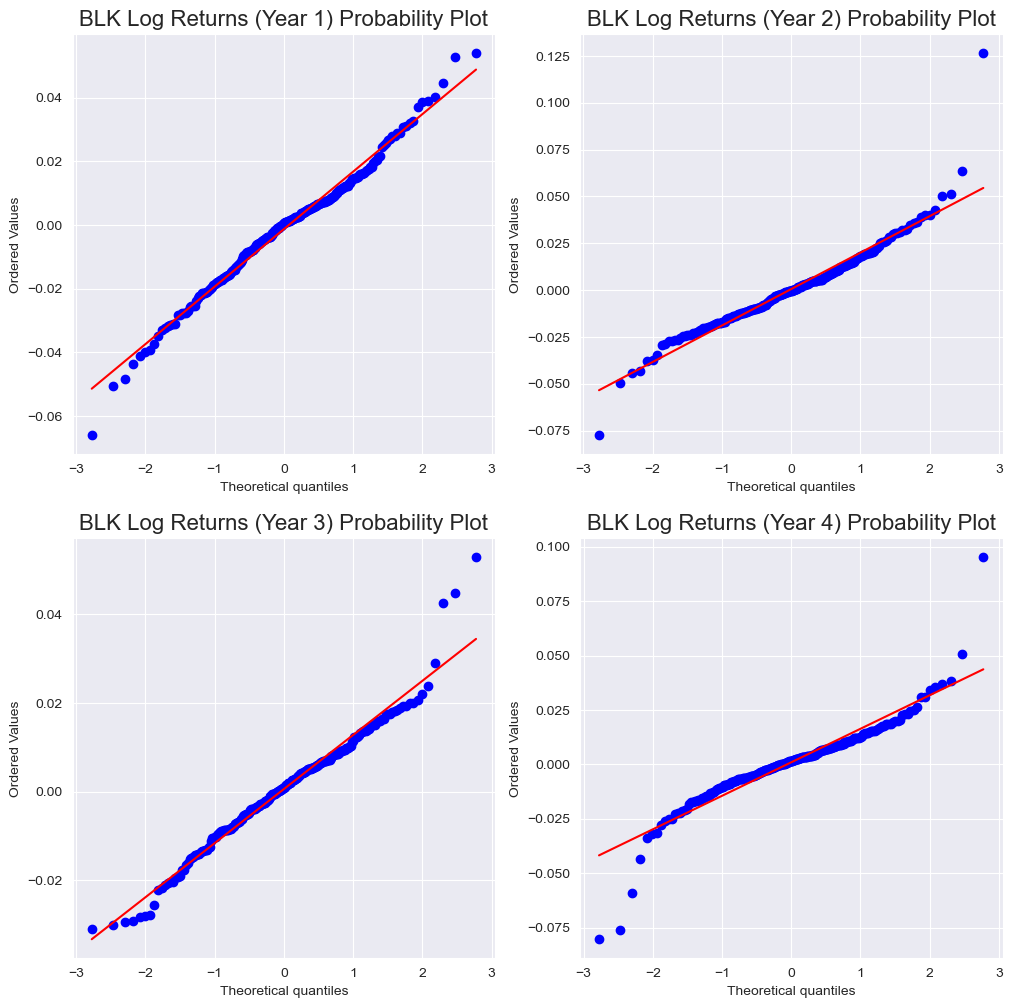

BLK log return (year 1) distribution: p-value = 0.0622
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
BLK log return (year 2) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
BLK log return (year 3) distribution: p-value = 0.0004
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
BLK log return (year 4) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distribu

In [14]:
BLK_logreturns_year1 = BLK_logreturns[0:yearly_index]
BLK_logreturns_year2 = BLK_logreturns[yearly_index:2*yearly_index]
BLK_logreturns_year3 = BLK_logreturns[2*yearly_index:3*yearly_index]
BLK_logreturns_year4 = BLK_logreturns[3*yearly_index:]

BLK_year1 = BLK_stock['Close'].iloc[0:yearly_index]
BLK_year2 = BLK_stock['Close'].iloc[yearly_index:2*yearly_index]
BLK_year3 = BLK_stock['Close'].iloc[2*yearly_index:3*yearly_index]
BLK_year4 = BLK_stock['Close'].iloc[3*yearly_index:]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

print("---"*20)
print("---"*20)
print("PLOTS OF CLOSING STOCK PRICES:")
print("---"*20)
print("---"*20)

axes[0,0].plot(BLK_year1)
axes[0,0].set_title('BLK Stock (year 1)', fontsize=16)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Close Price')
axes[0,0].grid(True)

axes[0,1].plot(BLK_year2)
axes[0,1].set_title('BLK Stock (year 2)', fontsize=16)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Close Price')
axes[0,1].grid(True)

axes[1,0].plot(BLK_year3)
axes[1,0].set_title('BLK Stock (year 3)', fontsize=16)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Close Price')
axes[1,0].grid(True)

axes[1,1].plot(BLK_year4)
axes[1,1].set_title('BLK Stock (year 4)', fontsize=16)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Close Price')
axes[1,1].grid(True)

plt.show()

print("---"*20)
print("---"*20)

print("PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:")

print("---"*20)
print("---"*20)


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stats.probplot(BLK_logreturns_year1, dist="norm", plot=axes[0,0])
axes[0,0].set_title('BLK Log Returns (Year 1) Probability Plot', fontsize = 16)
axes[0,0].grid(True)

stats.probplot(BLK_logreturns_year2, dist="norm", plot=axes[0,1])
axes[0,1].set_title('BLK Log Returns (Year 2) Probability Plot', fontsize = 16)
axes[0,1].grid(True)

stats.probplot(BLK_logreturns_year3, dist="norm", plot=axes[1,0])
axes[1,0].set_title('BLK Log Returns (Year 3) Probability Plot', fontsize = 16)
axes[1,0].grid(True)

stats.probplot(BLK_logreturns_year4, dist="norm", plot=axes[1,1])
axes[1,1].set_title('BLK Log Returns (Year 4) Probability Plot', fontsize = 16)
axes[1,1].grid(True)

plt.show()



p_BLK_year1 = stats.normaltest(BLK_logreturns_year1)[1]
p_BLK_year2 = stats.normaltest(BLK_logreturns_year2)[1]
p_BLK_year3 = stats.normaltest(BLK_logreturns_year3)[1]
p_BLK_year4 = stats.normaltest(BLK_logreturns_year4)[1]

print(f"BLK log return (year 1) distribution: p-value = {p_BLK_year1:.4f}")
if p_BLK_year1 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"BLK log return (year 2) distribution: p-value = {p_BLK_year2:.4f}")
if p_BLK_year2 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"BLK log return (year 3) distribution: p-value = {p_BLK_year3:.4f}")
if p_BLK_year3 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"BLK log return (year 4) distribution: p-value = {p_BLK_year4:.4f}")
if p_BLK_year4 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

**Summary**: So we have evidence to suggest that the log returns of BLK are normally distributed in year 1! (Note however that the p-value is only just greater than 0.05). But only year 1; every other year, we have strong evidence to suggest that the log returns are _not_ normally distributed.

#### NVDA analysis.

------------------------------------------------------------
------------------------------------------------------------
PLOTS OF CLOSING STOCK PRICES:
------------------------------------------------------------
------------------------------------------------------------


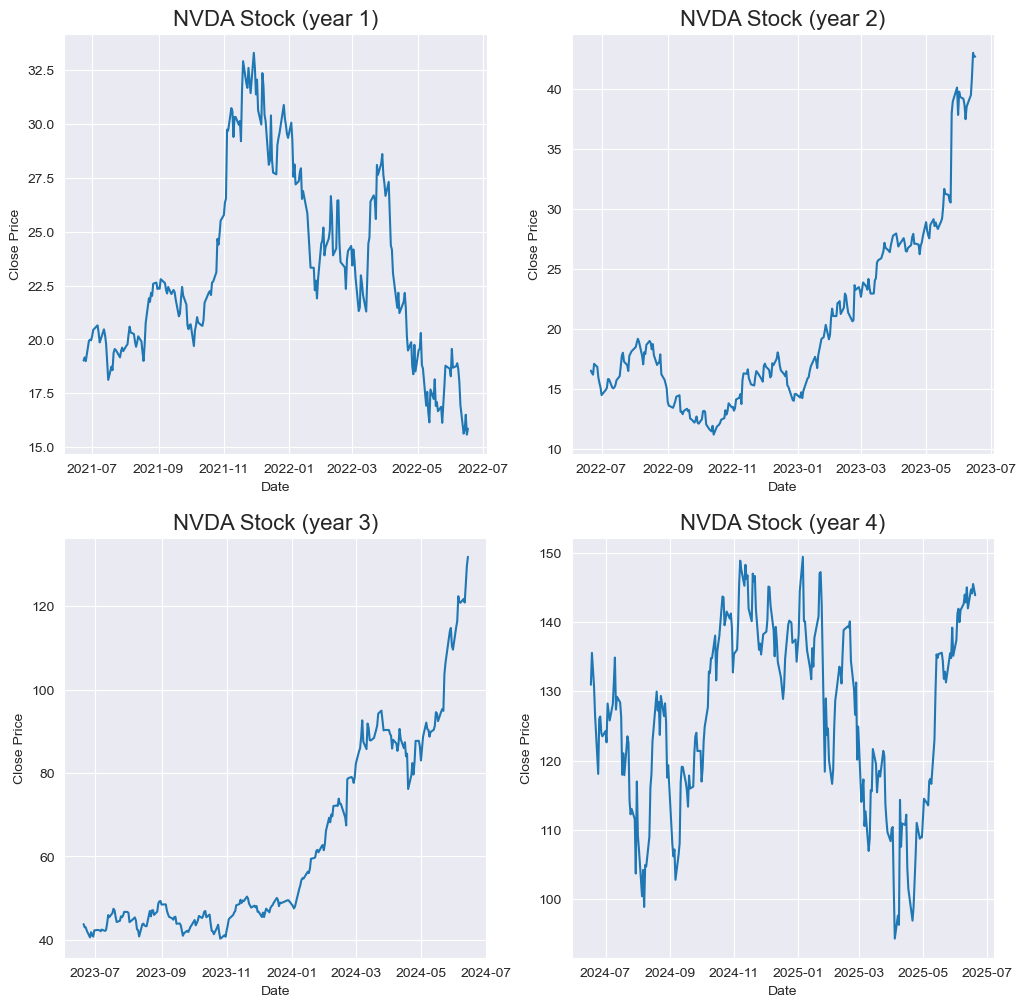

------------------------------------------------------------
------------------------------------------------------------
PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:
------------------------------------------------------------
------------------------------------------------------------


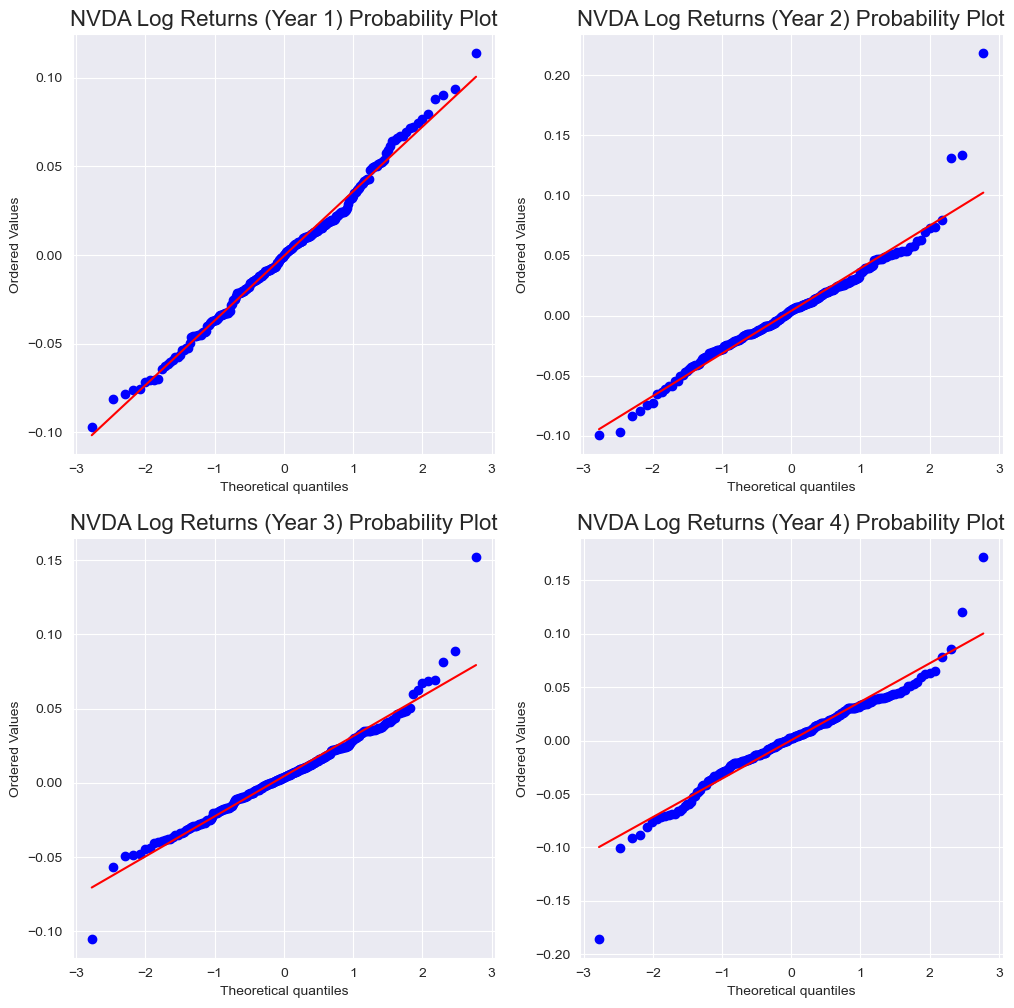

NVDA log return (year 1) distribution: p-value = 0.3673
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return (year 2) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return (year 3) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return (year 4) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally dist

In [15]:
NVDA_logreturns_year1 = NVDA_logreturns[0:yearly_index]
NVDA_logreturns_year2 = NVDA_logreturns[yearly_index:2*yearly_index]
NVDA_logreturns_year3 = NVDA_logreturns[2*yearly_index:3*yearly_index]
NVDA_logreturns_year4 = NVDA_logreturns[3*yearly_index:]

NVDA_year1 = NVDA_stock['Close'].iloc[0:yearly_index]
NVDA_year2 = NVDA_stock['Close'].iloc[yearly_index:2*yearly_index]
NVDA_year3 = NVDA_stock['Close'].iloc[2*yearly_index:3*yearly_index]
NVDA_year4 = NVDA_stock['Close'].iloc[3*yearly_index:]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

print("---"*20)
print("---"*20)
print("PLOTS OF CLOSING STOCK PRICES:")
print("---"*20)
print("---"*20)

axes[0,0].plot(NVDA_year1)
axes[0,0].set_title('NVDA Stock (year 1)', fontsize=16)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Close Price')
axes[0,0].grid(True)

axes[0,1].plot(NVDA_year2)
axes[0,1].set_title('NVDA Stock (year 2)', fontsize=16)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Close Price')
axes[0,1].grid(True)

axes[1,0].plot(NVDA_year3)
axes[1,0].set_title('NVDA Stock (year 3)', fontsize=16)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Close Price')
axes[1,0].grid(True)

axes[1,1].plot(NVDA_year4)
axes[1,1].set_title('NVDA Stock (year 4)', fontsize=16)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Close Price')
axes[1,1].grid(True)

plt.show()


print("---"*20)
print("---"*20)

print("PROBABILITY PLOTS FOR NORMALITY OF LOG RETURNS:")

print("---"*20)
print("---"*20)


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stats.probplot(NVDA_logreturns_year1, dist="norm", plot=axes[0,0])
axes[0,0].set_title('NVDA Log Returns (Year 1) Probability Plot', fontsize = 16)
axes[0,0].grid(True)

stats.probplot(NVDA_logreturns_year2, dist="norm", plot=axes[0,1])
axes[0,1].set_title('NVDA Log Returns (Year 2) Probability Plot', fontsize = 16)
axes[0,1].grid(True)

stats.probplot(NVDA_logreturns_year3, dist="norm", plot=axes[1,0])
axes[1,0].set_title('NVDA Log Returns (Year 3) Probability Plot', fontsize = 16)
axes[1,0].grid(True)

stats.probplot(NVDA_logreturns_year4, dist="norm", plot=axes[1,1])
axes[1,1].set_title('NVDA Log Returns (Year 4) Probability Plot', fontsize = 16)
axes[1,1].grid(True)

plt.show()

p_NVDA_year1 = stats.normaltest(NVDA_logreturns_year1)[1]
p_NVDA_year2 = stats.normaltest(NVDA_logreturns_year2)[1]
p_NVDA_year3 = stats.normaltest(NVDA_logreturns_year3)[1]
p_NVDA_year4 = stats.normaltest(NVDA_logreturns_year4)[1]


print(f"NVDA log return (year 1) distribution: p-value = {p_NVDA_year1:.4f}")
if p_NVDA_year1 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"NVDA log return (year 2) distribution: p-value = {p_NVDA_year2:.4f}")
if p_NVDA_year2 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"NVDA log return (year 3) distribution: p-value = {p_NVDA_year3:.4f}")
if p_NVDA_year3 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"NVDA log return (year 4) distribution: p-value = {p_NVDA_year4:.4f}")
if p_NVDA_year4 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

**Summary**: So we have evidence to suggest that the log returns of NVDA are normally distributed in year 1! Every other year, we have strong evidence to suggest that the log returns are _not_ normally distributed.

### Assorted portfolios

Same analyses as above but now for the portfolios:

1) The less risky portfolio from mini-project 1: 0.4 GLD + 0.4 VOO + 0.2 TMUS.
2) A random personalised portfolio of my choosing: \
   0.15 BAC + 0.15 BLK + 0.15 GS + 0.15 NFLX + 0.2 NVDA + 0.15 TMUS + 0.15 UBER.

#### Portfolio 1: 0.4 GLD + 0.4 VOO + 0.2 TMUS.

In [272]:
start_date = dt.datetime(2025, 6, 22, 0, 0, 0, 0) - dt.timedelta(days = 4*365)
end_date = dt.datetime(2025, 6, 22, 0, 0, 0, 0)

stocks1=yf.download(['GLD', 'VOO', 'TMUS'], start = start_date, end = end_date, auto_adjust=True)
closes1=stocks1['Close']

w0=0.4
w1=0.4
w2=0.2

# Create the portfolio

p1_prices = w0 * (closes1['GLD'].values) + w1 * (closes1['VOO'].values) + w2 * (closes1['TMUS'].values) 
closes1 = closes1.assign(P1=pd.Series(p1_prices).values)

P1_returns = closes1['P1']/closes1['P1'].shift(1)
P1_logreturns = np.log(P1_returns.dropna()).values

[*********************100%***********************]  3 of 3 completed


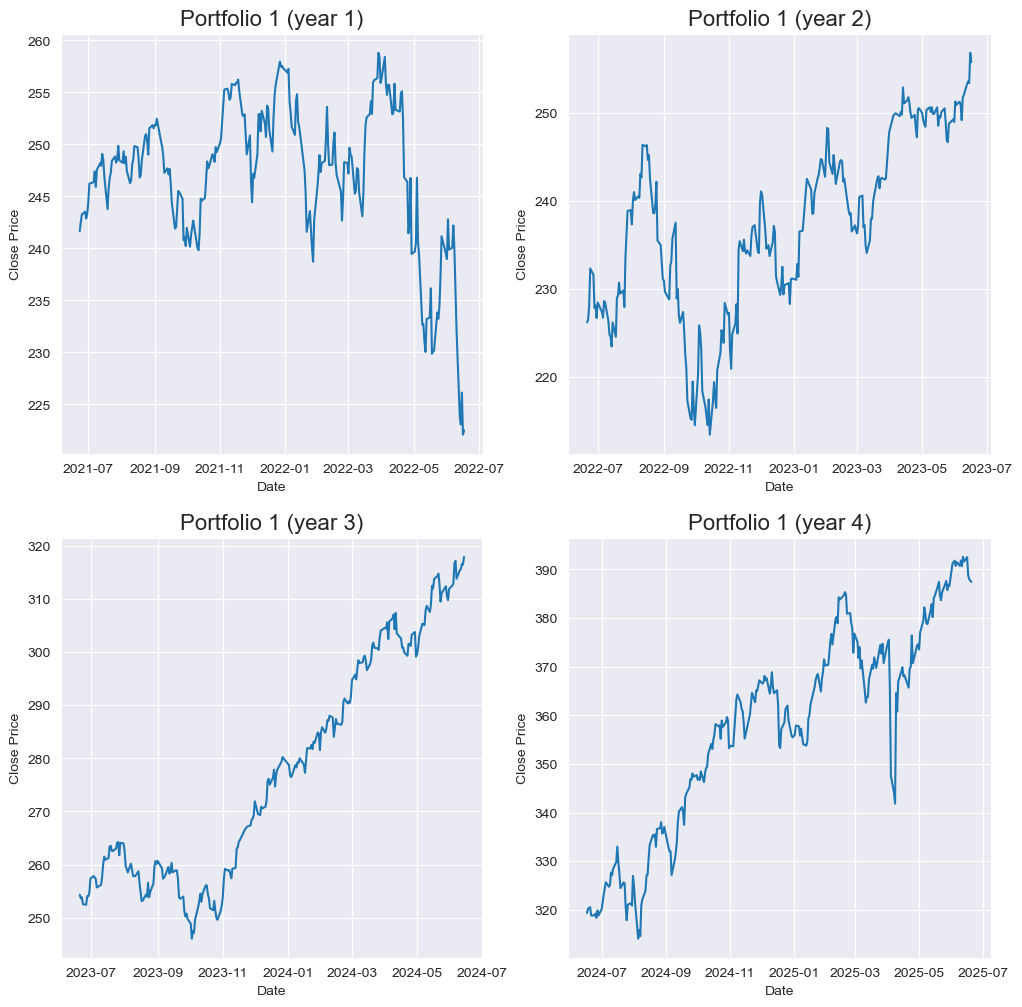

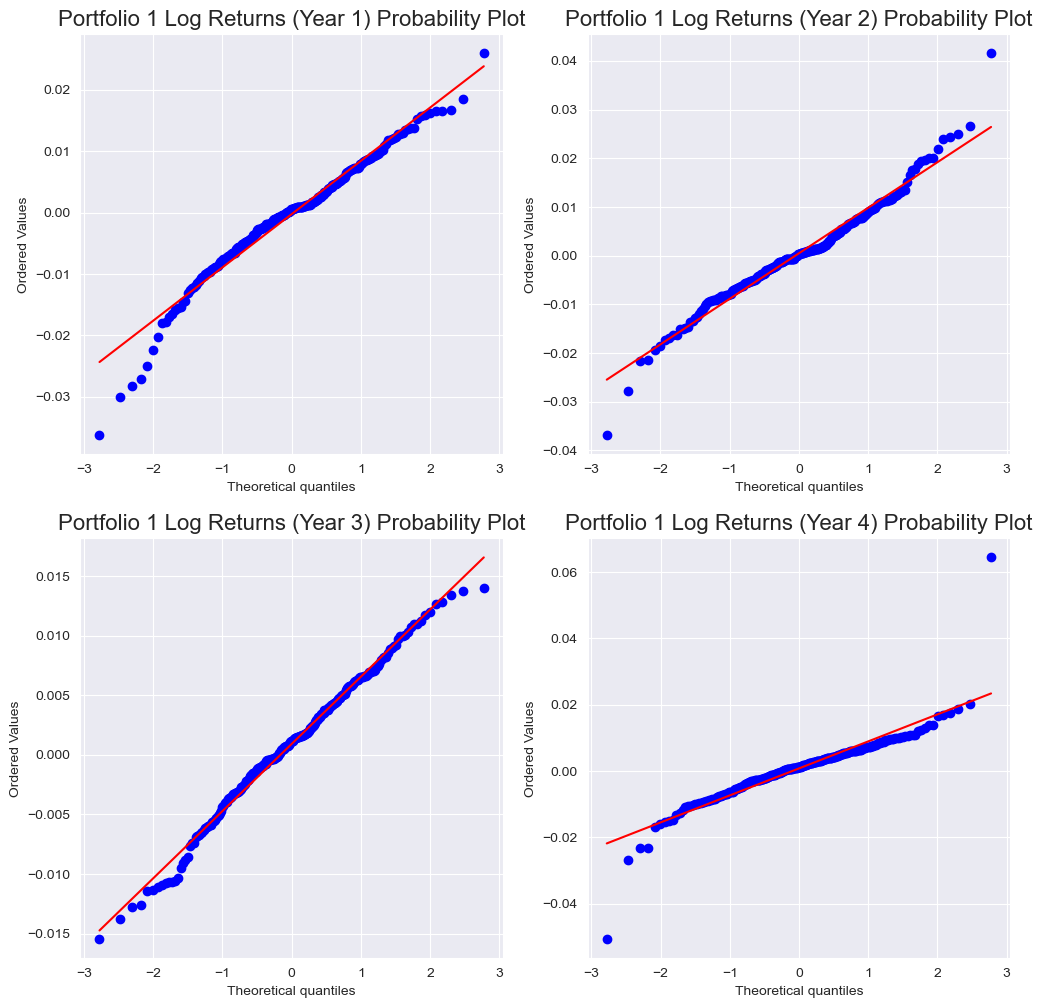

P1 log return (year 1) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
P1 log return (year 2) distribution: p-value = 0.0001
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
P1 log return (year 3) distribution: p-value = 0.2630
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
P1 log return (year 4) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.

In [273]:
P1_logreturns_year1 = P1_logreturns[0:yearly_index]
P1_logreturns_year2 = P1_logreturns[yearly_index:2*yearly_index]
P1_logreturns_year3 = P1_logreturns[2*yearly_index:3*yearly_index]
P1_logreturns_year4 = P1_logreturns[3*yearly_index:]

P1_year1 = closes1['P1'].iloc[0:yearly_index]
P1_year2 = closes1['P1'].iloc[yearly_index:2*yearly_index]
P1_year3 = closes1['P1'].iloc[2*yearly_index:3*yearly_index]
P1_year4 = closes1['P1'].iloc[3*yearly_index:]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plt.plot

axes[0,0].plot(P1_year1)
axes[0,0].set_title('Portfolio 1 (year 1)', fontsize=16)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Close Price')
axes[0,0].grid(True)

axes[0,1].plot(P1_year2)
axes[0,1].set_title('Portfolio 1 (year 2)', fontsize=16)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Close Price')
axes[0,1].grid(True)

axes[1,0].plot(P1_year3)
axes[1,0].set_title('Portfolio 1 (year 3)', fontsize=16)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Close Price')
axes[1,0].grid(True)

axes[1,1].plot(P1_year4)
axes[1,1].set_title('Portfolio 1 (year 4)', fontsize=16)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Close Price')
axes[1,1].grid(True)

plt.show()


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stats.probplot(P1_logreturns_year1, dist="norm", plot=axes[0,0])
axes[0,0].set_title('Portfolio 1 Log Returns (Year 1) Probability Plot', fontsize = 16)
axes[0,0].grid(True)

stats.probplot(P1_logreturns_year2, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Portfolio 1 Log Returns (Year 2) Probability Plot', fontsize = 16)
axes[0,1].grid(True)

stats.probplot(P1_logreturns_year3, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Portfolio 1 Log Returns (Year 3) Probability Plot', fontsize = 16)
axes[1,0].grid(True)

stats.probplot(P1_logreturns_year4, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Portfolio 1 Log Returns (Year 4) Probability Plot', fontsize = 16)
axes[1,1].grid(True)

plt.show()

p_P1_year1 = stats.normaltest(P1_logreturns_year1)[1]
p_P1_year2 = stats.normaltest(P1_logreturns_year2)[1]
p_P1_year3 = stats.normaltest(P1_logreturns_year3)[1]
p_P1_year4 = stats.normaltest(P1_logreturns_year4)[1]


print(f"P1 log return (year 1) distribution: p-value = {p_P1_year1:.4f}")
if p_P1_year1 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"P1 log return (year 2) distribution: p-value = {p_P1_year2:.4f}")
if p_P1_year2 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"P1 log return (year 3) distribution: p-value = {p_P1_year3:.4f}")
if p_P1_year3 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"P1 log return (year 4) distribution: p-value = {p_P1_year4:.4f}")
if p_P1_year4 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

**Observations:** We have evidence that log returns of portfolio 1 (0.4(GLD) + 0.4(VOO) + 0.2(TMUS)) are normally distributed in year 3, and strong evidence that log returns are not normally distributed in years 1,2,4. This is despite our earlier strong evidence to suggest that the log returns of GLD are _not_ normal in year 3. So diversifying our portfolio has had the effect of 'normalising' log returns.

#### Portfolio 2: 0.15 BAC + 0.15 BLK + 0.15 GS + 0.15 NFLX + 0.2 NVDA + 0.15 TMUS + 0.15 UBER.

In [299]:
start_date = dt.datetime(2025, 6, 22, 0, 0, 0, 0) - dt.timedelta(days = 4*365)
end_date = dt.datetime(2025, 6, 22, 0, 0, 0, 0)

stocks2=yf.download(['GS', 'TMUS', 'UBER', 'NFLX', 'NVDA', 'BK', 'BAC'], start = start_date, end = end_date, auto_adjust=True)
closes2=stocks2['Close']

w0=0.15
w1=0.15
w2=0.15
w3=0.15
w4=0.2
w5=0.15
w6=0.15

# Create the portfolio

p2_prices = w0 * (closes2['GS'].values) + w1 * (closes2['TMUS'].values) 
+ w2 * (closes2['UBER'].values) + w3 * (closes2['NFLX'].values) 
+ w4 * (closes2['NVDA'].values) + w5 * (closes2['BK'].values)  
+ w6 * (closes2['BAC'].values) 

closes2 = closes2.assign(P2=pd.Series(p2_prices).values)

P2_returns = closes2['P2']/closes2['P2'].shift(1)
P2_logreturns = np.log(P2_returns.dropna()).values

[*********************100%***********************]  7 of 7 completed


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


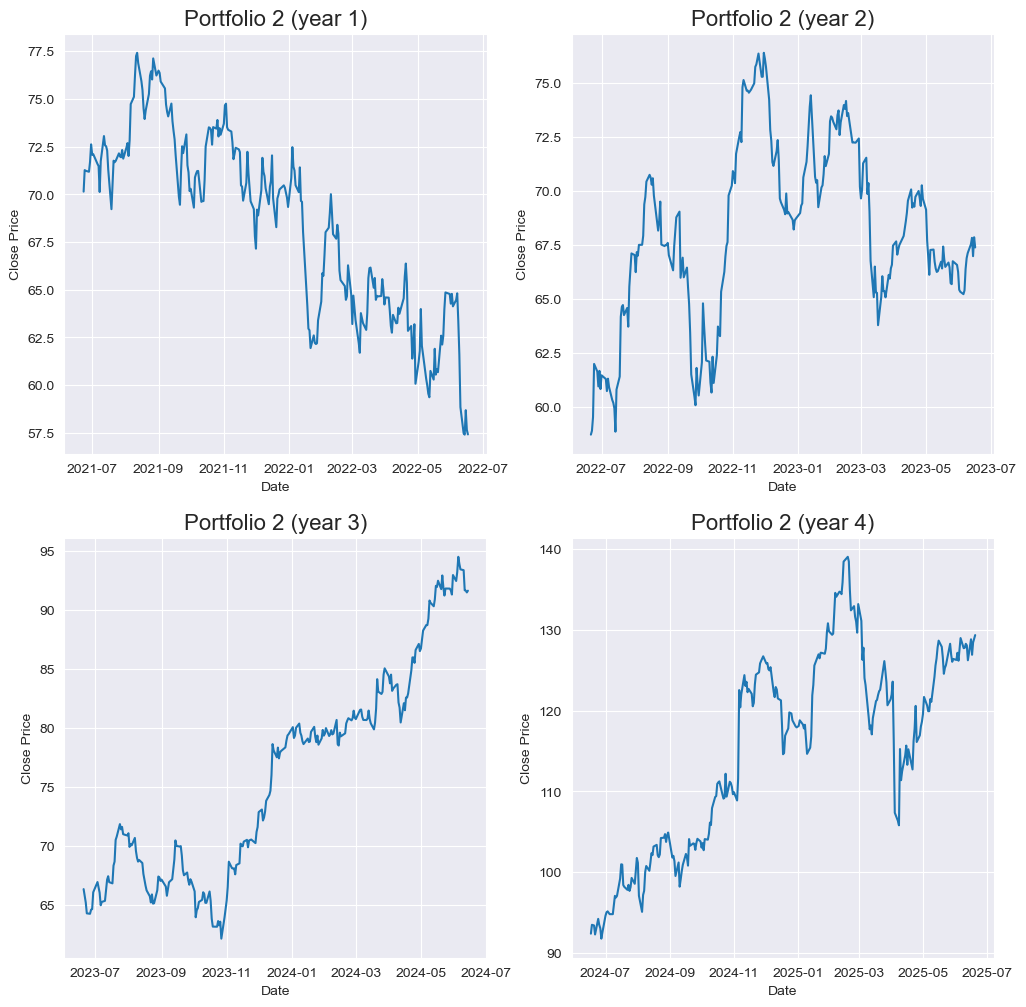

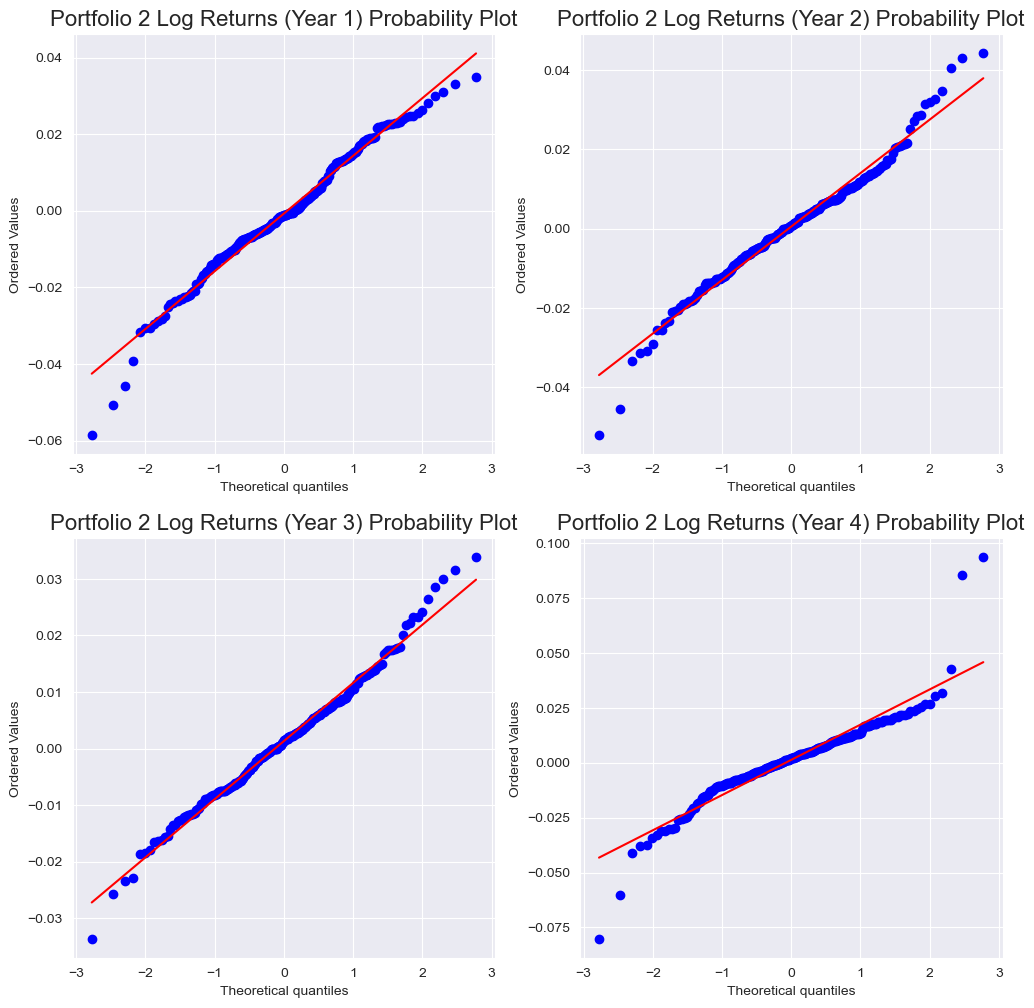

P2 log return (year 1) distribution: p-value = 0.0121
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
P2 log return (year 2) distribution: p-value = 0.0025
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
P2 log return (year 3) distribution: p-value = 0.0603
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
P2 log return (year 4) distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.

In [301]:
P2_logreturns_year1 = P2_logreturns[0:yearly_index]
P2_logreturns_year2 = P2_logreturns[yearly_index:2*yearly_index]
P2_logreturns_year3 = P2_logreturns[2*yearly_index:3*yearly_index]
P2_logreturns_year4 = P2_logreturns[3*yearly_index:]

P2_year1 = closes2['P2'].iloc[0:yearly_index]
P2_year2 = closes2['P2'].iloc[yearly_index:2*yearly_index]
P2_year3 = closes2['P2'].iloc[2*yearly_index:3*yearly_index]
P2_year4 = closes2['P2'].iloc[3*yearly_index:]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].plot(P2_year1)
axes[0,0].set_title('Portfolio 2 (year 1)', fontsize=16)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Close Price')
axes[0,0].grid(True)

axes[0,1].plot(P2_year2)
axes[0,1].set_title('Portfolio 2 (year 2)', fontsize=16)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Close Price')
axes[0,1].grid(True)

axes[1,0].plot(P2_year3)
axes[1,0].set_title('Portfolio 2 (year 3)', fontsize=16)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Close Price')
axes[1,0].grid(True)

axes[1,1].plot(P2_year4)
axes[1,1].set_title('Portfolio 2 (year 4)', fontsize=16)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Close Price')
axes[1,1].grid(True)

plt.show()


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

stats.probplot(P2_logreturns_year1, dist="norm", plot=axes[0,0])
axes[0,0].set_title('Portfolio 2 Log Returns (Year 1) Probability Plot', fontsize = 16)
axes[0,0].grid(True)

stats.probplot(P2_logreturns_year2, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Portfolio 2 Log Returns (Year 2) Probability Plot', fontsize = 16)
axes[0,1].grid(True)

stats.probplot(P2_logreturns_year3, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Portfolio 2 Log Returns (Year 3) Probability Plot', fontsize = 16)
axes[1,0].grid(True)

stats.probplot(P2_logreturns_year4, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Portfolio 2 Log Returns (Year 4) Probability Plot', fontsize = 16)
axes[1,1].grid(True)

plt.show()

p_P2_year1 = stats.normaltest(P2_logreturns_year1)[1]
p_P2_year2 = stats.normaltest(P2_logreturns_year2)[1]
p_P2_year3 = stats.normaltest(P2_logreturns_year3)[1]
p_P2_year4 = stats.normaltest(P2_logreturns_year4)[1]


print(f"P2 log return (year 1) distribution: p-value = {p_P2_year1:.4f}")
if p_P2_year1 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"P2 log return (year 2) distribution: p-value = {p_P2_year2:.4f}")
if p_P2_year2 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"P2 log return (year 3) distribution: p-value = {p_P2_year3:.4f}")
if p_P2_year3 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"P2 log return (year 4) distribution: p-value = {p_P2_year4:.4f}")
if p_P2_year4 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

**Observations:** once again, the data suggests log returns are normally distributed in year 3.

### Closing remark

It is curious that the daily log returns in year 3 (2023-06-21 to 2024-06-17) seem to be normally distributed for VOO and Portfolios 1 and 2, and thus 'business as usual' in this year. It would be interesting to examine whether this phenomenon can be explained by economic or other factors outside the market at the time. 